In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score,accuracy_score


In [4]:
df=pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#remove unnecessary colums
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)
#convert target column
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})


In [6]:
#splitting features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [7]:
#standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
print("Model trained successfully")


Model trained successfully


In [13]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9736842105263158


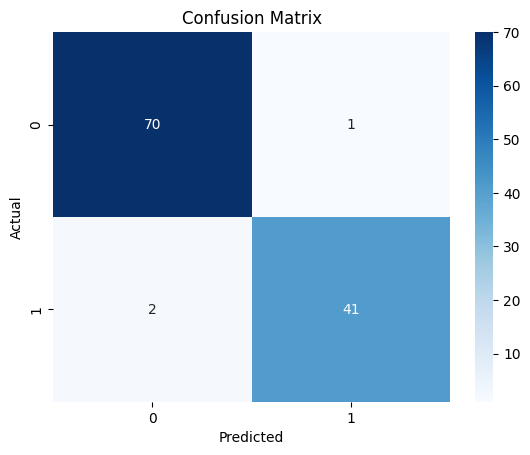

In [ ]:
#classification report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [15]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



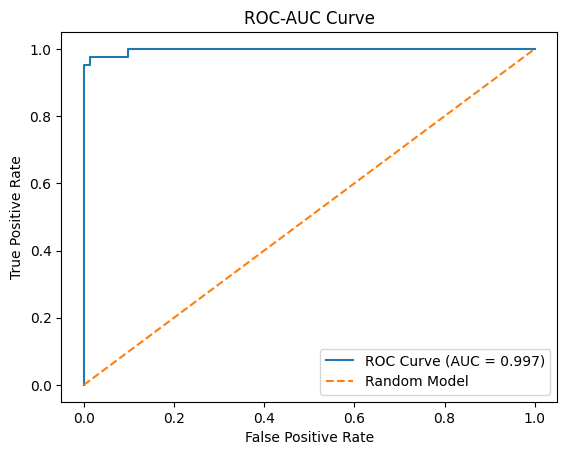

AUC Score: 0.99737962659679


In [ ]:
# roc auc curve
y_prob = model.predict_proba(X_test)[:, 1]
# Calculate ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)
# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (AUC = %.3f)" % auc_score)
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()
print("AUC Score:", auc_score)


In [17]:
#Threshold tuning
new_threshold = 0.4
y_new = (y_prob > new_threshold).astype(int)
print("Accuracy with threshold 0.4:", accuracy_score(y_test, y_new))

Accuracy with threshold 0.4: 0.9824561403508771


LOGISTIC REGRESSION:
Logistic Regression is a supervised machine learning algorithm used for binary classification problems.
It predicts the probability that a given input belongs to a particular class (0 or 1).
Instead of predicting continuous values like Linear Regression, Logistic Regression predicts probability values between 0 and 1.
If probability > 0.5 → Class 1
If probability < 0.5 → Class 0
It is widely used in medical diagnosis, spam detection, fraud detection, etc.

SIGMOID FUNCTION:
The Sigmoid Function is used in Logistic Regression to convert any real value into a probability between 0 and 1.
Properties:
Output range: 0 to 1
S-shaped curve
Helps in binary classification
It transforms the linear output into probability.

CONFUSION MATRIX:
A Confusion Matrix is a table used to evaluate classification models.
It contains four values:
True Positive (TP) → Correctly predicted positive
True Negative (TN) → Correctly predicted negative
False Positive (FP) → Incorrectly predicted positive
False Negative (FN) → Incorrectly predicted negative
It helps us calculate accuracy, precision, recall, f1score


ROC AND AUC CURVES:
ROC (Receiver Operating Characteristic) Curve is a graph that shows the performance of a classification model at different threshold values.
It plots:
True Positive Rate (Recall)
False Positive Rate
AUC (Area Under Curve) measures how well the model separates the classes.
AUC = 1 → Perfect model
AUC = 0.5 → Random guessing
Closer to 1 → Better model